In [1]:
import pandas as pd


In [2]:
path ="D:/Python/ACW/600092_data.csv" 

In [3]:
df = pd.read_csv(path, encoding = 'utf-8')

In [4]:
df

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
0,0.602437,218242,A-F,no,no,yes,no,no,78.0,20,NoRisk
1,0.602437,159284,TIA,no,no,no,no,no,70.0,60,NoRisk
2,0.602437,106066,A-F,no,yes,yes,no,no,95.0,40,Risk
3,0.128157,229592,TIA,no,no,yes,no,no,90.0,85,Risk
4,0.676862,245829,CVA,no,no,no,no,no,70.0,20,NoRisk
...,...,...,...,...,...,...,...,...,...,...,...
1515,0.391440,93406,A-F,no,yes,no,no,no,76.0,60,NoRisk
1516,0.253504,121814,A-F,no,no,yes,yes,no,90.0,75,Risk
1517,0.620373,101754,TIA,no,no,yes,no,no,75.0,20,NoRisk
1518,0.639342,263836,A-F,no,yes,no,no,no,70.0,45,NoRisk


In [5]:
diabetes_col = df['Diabetes']
diabetes_col

0       no
1       no
2       no
3       no
4       no
        ..
1515    no
1516    no
1517    no
1518    no
1519    no
Name: Diabetes, Length: 1520, dtype: object

In [6]:
diabetes_col.isnull().values.any()

True

In [7]:
diabetes_col.isnull().sum()

2

# Testing for null values using var

In [8]:
var = df['label']
var.isnull().sum()

3

# Data visualization trial (BM)

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
%matplotlib inline

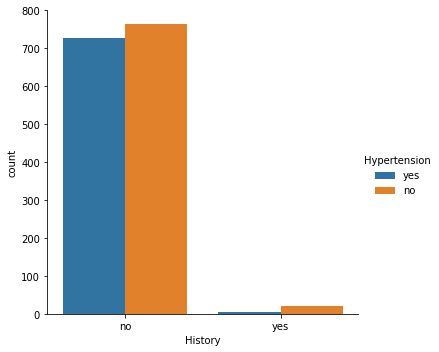

In [11]:
sns.catplot('History', data = df, kind='count' ,hue = 'Hypertension')

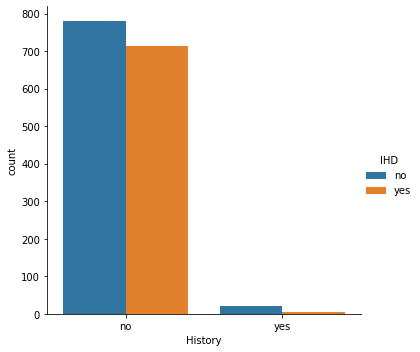

In [12]:
sns.catplot('History', data = df, kind='count' ,hue = 'IHD')

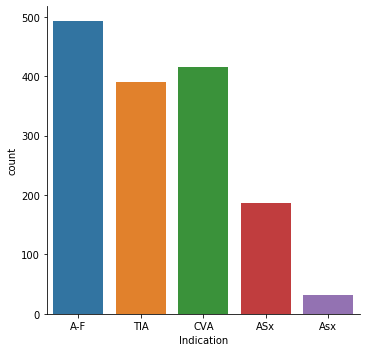

In [13]:
sns.catplot('Indication', data = df, kind='count' )

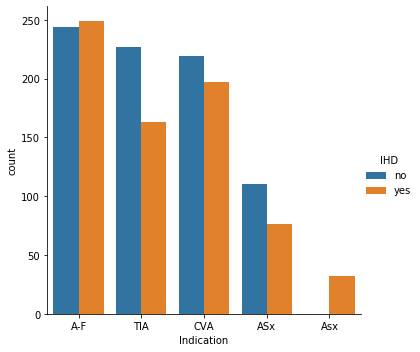

In [14]:
sns.catplot('Indication', data = df, kind='count', hue = 'IHD')

In [15]:
##DATA NEEDS CLEANING AT ASX

In [16]:
df['Indication'] = df['Indication'].replace(['Asx'], 'ASx')

In [17]:
for index, row in df.iterrows(): 
     if ((row["Indication"])== "Asx"):
       print(row["Indication"])

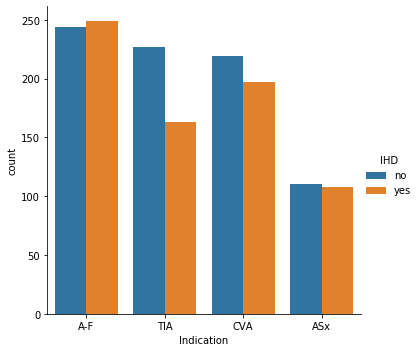

In [18]:
sns.catplot('Indication', data = df, kind='count', hue = 'IHD')

# DID MY FIRSTCLEANING XD

In [19]:
df.corr() 

,Random,Id,IPSI
Random,1.000000,0.051493,-0.039069
Id,0.051493,1.000000,-0.044004
IPSI,-0.039069,-0.044004,1.000000


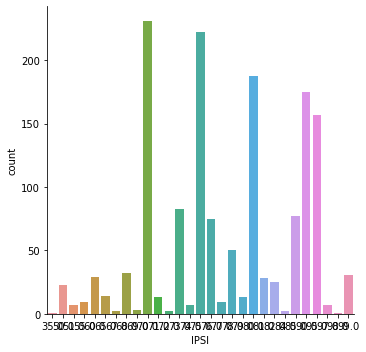

In [20]:
sns.catplot('IPSI', data = df, kind='count')

{'whiskers': [<matplotlib.lines.Line2D at 0x20c83e66908>,
 'caps': [<matplotlib.lines.Line2D at 0x20c83e6b8c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x20c83e60e08>],
 'medians': [<matplotlib.lines.Line2D at 0x20c83e6f848>],
 'fliers': [<matplotlib.lines.Line2D at 0x20c83e6ffc8>],
 'means': []}

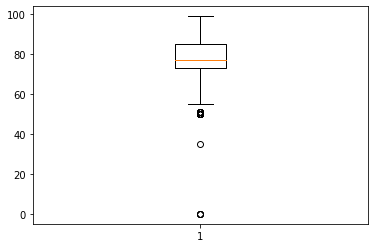

In [21]:
plt.boxplot(df.IPSI.fillna(0))

In [22]:
df['Indication'].isnull().sum()

3

In [23]:
df.describe()

,Random,Id,IPSI
count,1520.000000,1520.000000,1516.000000
mean,0.509545,188365.022368,78.872032
std,0.284006,64355.870242,10.162351
min,0.000295,78261.000000,35.000000
25%,0.268531,137130.750000,73.000000
50%,0.517616,191344.500000,77.000000
75%,0.754724,244559.500000,85.000000
max,0.999448,295978.000000,99.000000


In [24]:
df1 = df[df.isna().any(axis=1)]
print (df1)

        Random      Id Indication Diabetes  IHD Hypertension Arrhythmia  \
201   0.388790  240232        CVA      yes   no          NaN        yes   
337   0.617072  260770        CVA       no  yes           no         no   
442   0.648122  261060        NaN       no  yes          yes         no   
447   0.681744  224257        CVA      NaN  yes          yes        yes   
514   0.392130  210861        A-F      NaN   no          yes         no   
590   0.707950  289096        A-F       no   no          NaN         no   
620   0.283872  227779        A-F       no   no           no         no   
752   0.243518  146415        CVA       no  yes          yes        yes   
784   0.243645  196483        CVA       no   no          yes        yes   
812   0.756938  190671        CVA       no  yes          yes         no   
822   0.211760  205845        NaN       no  yes           no         no   
845   0.920096  104176        CVA       no   no           no         no   
916   0.004501  281679   